In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import calendar as cal
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seattle/calendar.csv
/kaggle/input/seattle/listings.csv
/kaggle/input/seattle/reviews.csv


# Gather Data

In [65]:
# Open CSV
calendar = pd.read_csv('/kaggle/input/seattle/calendar.csv')
listings = pd.read_csv('/kaggle/input/seattle/listings.csv')
reviews = pd.read_csv('/kaggle/input/seattle/reviews.csv')

In [66]:
# See Data in each DataFrame
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [67]:
# See Data in each DataFrame
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [68]:
# See Columns of listings
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [69]:
# See Data in each DataFrame
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


# First Analysis

### Number of Columns and Rows

In [70]:
print(f'Calendar has {calendar.shape[0]} rows and {calendar.shape[1]} columns')
print(f'Listings has {listings.shape[0]} rows and {listings.shape[1]} columns')
print(f'Reviews has {reviews.shape[0]} rows and {reviews.shape[1]} columns')

Calendar has 1393570 rows and 4 columns
Listings has 3818 rows and 92 columns
Reviews has 84849 rows and 6 columns


### Missing Values

In [71]:
calendar_no_nulls = set(calendar.columns[calendar.isnull().mean()==0])
calendar_no_nulls

{'available', 'date', 'listing_id'}

In [72]:
listings_no_nulls = set(listings.columns[listings.isnull().mean()==0])
listings_no_nulls

{'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bed_type',
 'calculated_host_listings_count',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'guests_included',
 'has_availability',
 'host_id',
 'host_url',
 'host_verifications',
 'id',
 'instant_bookable',
 'is_location_exact',
 'jurisdiction_names',
 'last_scraped',
 'latitude',
 'listing_url',
 'longitude',
 'market',
 'maximum_nights',
 'minimum_nights',
 'name',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'number_of_reviews',
 'picture_url',
 'price',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'requires_license',
 'room_type',
 'scrape_id',
 'smart_location',
 'state',
 'street'}

In [73]:
reviews_no_nulls = set(reviews.columns[reviews.isnull().mean()==0])
reviews_no_nulls

{'date', 'id', 'listing_id', 'reviewer_id', 'reviewer_name'}

# Data Cleaning Functions

In [74]:
# Coverting Price as string into Float
def float_price(df,column):
    """ 
        This function will cast numerical columns that are currently
        strings and that have ',' in the thousand position 
        and return a new list with the values cast as float
    """
    
    price_without_dot = [(p.replace(",","")) if type(p) != float else p for p in df[column]]
    #[(p.replace(",","")) for p in df[column]]
    new_price = [float(p[1:]) if type(p) != float else p for p in price_without_dot]
    #[float(p[1:]) for p in price_without_dot]
    return new_price

# How much revenue do Airbnb hosts make?

## Data Cleaning

In [75]:
# Transform string with the price value into a float
# price_dot = [(p.replace(",","")) for p in listings['price']]
# new_price = [float(p[1:]) for p in price_dot]
# listings['price'] = new_price
listings['price'] = float_price(listings,'price')
listings['price'] 

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [76]:
# Group Listing by host
host_gb = listings.groupby(by=['host_id'], dropna=False).mean().reset_index()
host_gb[['host_id','price']]

,host_id,price
0,4193,79.5
1,6207,89.0
2,8021,85.0
3,8993,48.0
4,11775,70.0
...,...,...
2746,52990042,26.0
2747,53050379,20.0
2748,53065829,120.0
2749,53169216,40.0


In [77]:
# Check price feature data type in the calendar dataframe
type(calendar['price'][1]) == float

False

In [78]:
# Transform string with the price value into a float
calendar['price'] = float_price(calendar,'price')
#calendar['price'] = [(p.replace(",","")) if type(p) != float else p for p in calendar['price']]
#calendar['price'] = [float(p[1:]) if type(p) != float else p for p in calendar['price']]
calendar['price']

0          85.0
1          85.0
2           NaN
3           NaN
4           NaN
           ... 
1393565     NaN
1393566     NaN
1393567     NaN
1393568     NaN
1393569     NaN
Name: price, Length: 1393570, dtype: float64

In [79]:
# Copy calendar datframe into a new one and drop rows with dates where available equals f
calendar_avg = calendar.copy()
calendar_avg.drop(calendar_avg[calendar_avg.available == 'f'].index, inplace=True)

In [80]:
# Get number of days being analysis
number_day_calendar = len(calendar.date.unique())

In [81]:
# Gruop by listing_id and then the average price per day earn by each listing
calendar_avg = calendar_avg.groupby(by=['listing_id'], dropna=False).sum().reset_index()
calendar_avg['avg_price_day'] = [round(p/number_day_calendar,2) for p in calendar_avg['price']]
calendar_avg.head()

,listing_id,price,avg_price_day
0,3335,37080.0,101.59
1,4291,29930.0,82.00
2,5682,16669.0,45.67
3,6606,33890.0,92.85
4,7369,4505.0,12.34


In [82]:
# Get the columns that will be used in the merge of calendar and listing dataframe
filter_col_listings = [c for c in listings.columns if c != 'price']

In [83]:
# Merge both dataframes and order then by host_id
merge_list_cal = pd.merge(calendar_avg, listings[filter_col_listings], left_on=['listing_id'], right_on=['id'])
avg_per_host_prop = merge_list_cal[['host_id','listing_id','price','avg_price_day']].sort_values(by='host_id')
avg_per_host_prop.index = [i for i in range(len(avg_per_host_prop))]
avg_per_host_prop.head()

,host_id,listing_id,price,avg_price_day
0,4193,3335,37080.0,101.59
1,4193,7745016,6250.0,17.12
2,4193,6117473,17520.0,48.00
3,4193,1263470,18700.0,51.23
4,6207,1707064,67225.0,184.18


In [84]:
# Group by host_id in order to get how many properties has each host
listing_per_host = pd.DataFrame(avg_per_host_prop.groupby('host_id')['host_id'].count())
listing_per_host.columns = ['number_of_listings']
listing_per_host = listing_per_host.reset_index()

In [85]:
# Get average earnings by day for each host
avg_per_host = avg_per_host_prop[['host_id','price','avg_price_day']]
avg_per_host = avg_per_host.groupby(by=['host_id'], dropna=False).mean().reset_index()
avg_per_host.sort_values(by='price')
avg_per_host.head()

,host_id,price,avg_price_day
0,4193,19887.5,54.485
1,6207,67225.0,184.180
2,8021,17052.5,46.720
3,8993,16669.0,45.670
4,11775,26070.0,71.420


## Visualizations

<AxesSubplot:xlabel='number_of_listings'>

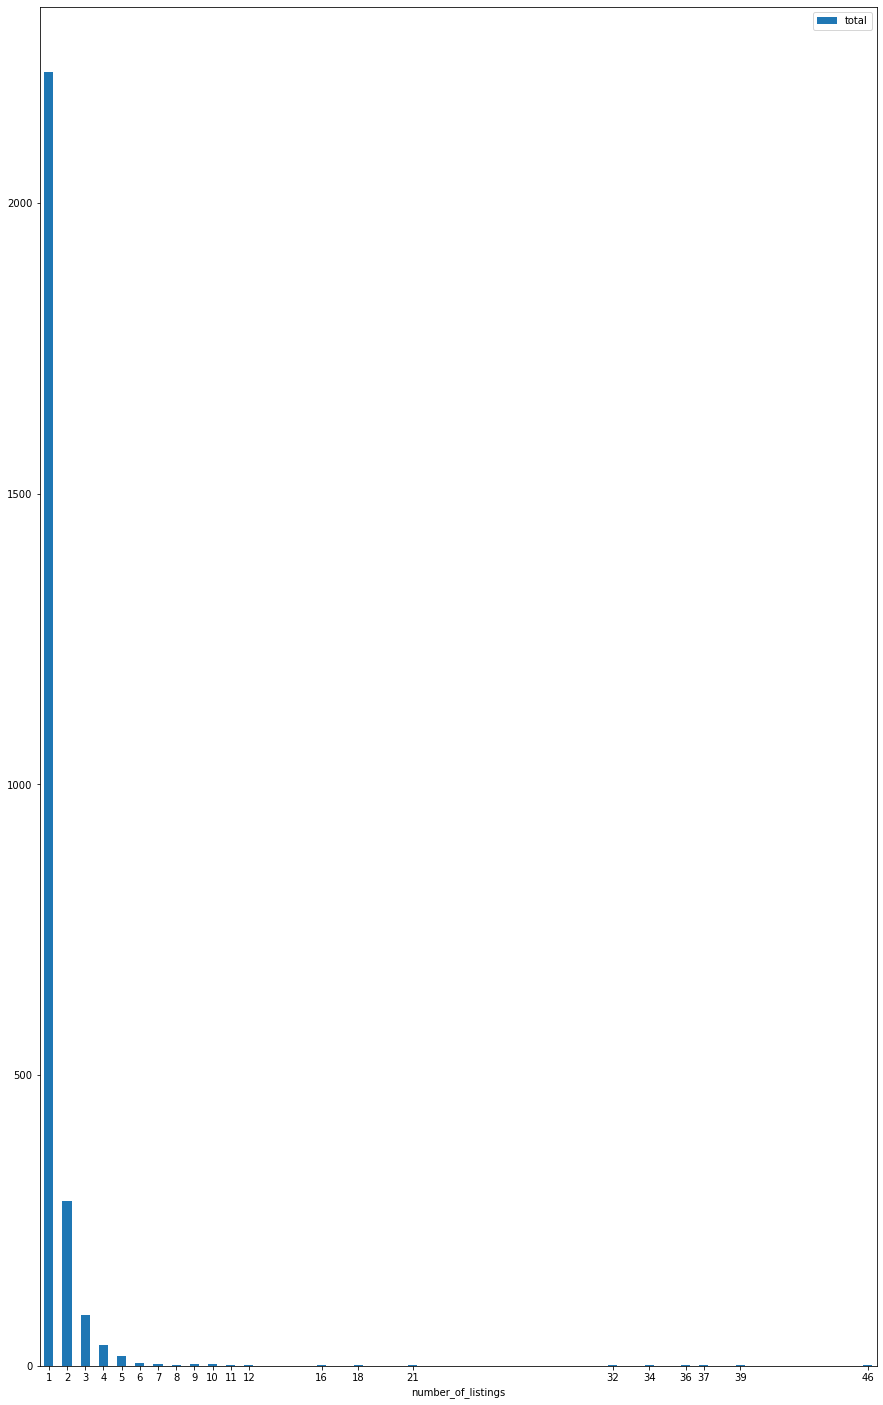

In [86]:
# Get how many host has how many properties. For ejemplo 2226 host have just one property
# Then let show that in a bar char
pro_num_total = pd.DataFrame(listing_per_host.groupby('number_of_listings')['host_id'].count()).reset_index()
pro_num_total = pro_num_total.rename(columns={'host_id': 'total'})
pro_num_total.plot.bar(x='number_of_listings', y='total', rot=0, figsize=(15,25))

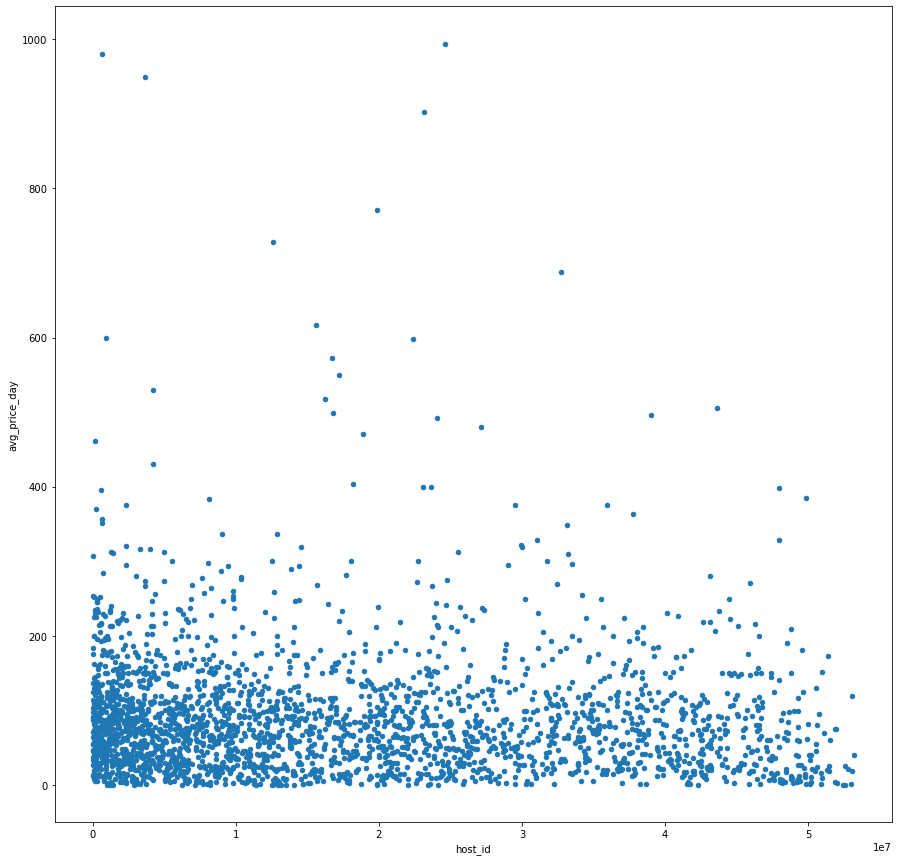

In [87]:
# Scatter plot of earning per day
ax = avg_per_host.plot.scatter(x='host_id', y='avg_price_day', rot=0, figsize=(15,15))

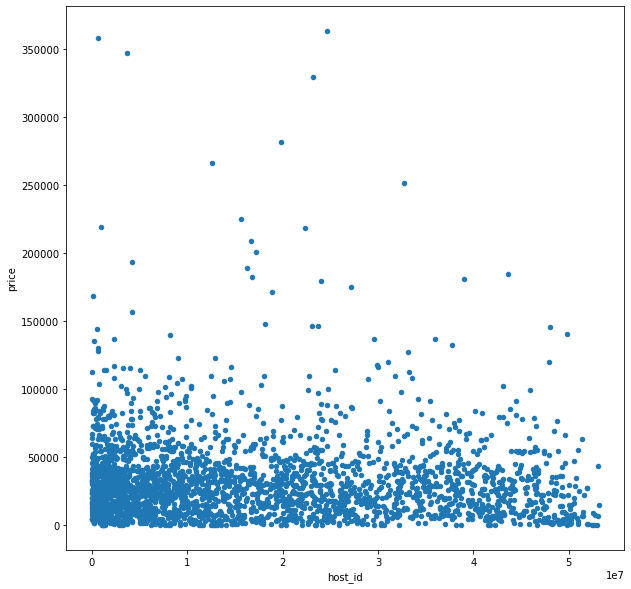

In [88]:
# Scatter plot of total earnings
ax = avg_per_host.plot.scatter(x='host_id', y='price', rot=0, figsize=(10,10))

## Further Analysis

In [89]:
# Get correlation between features in avg_per_host dataframe
df_corr = pd.merge(avg_per_host, listing_per_host, on='host_id')
corr_data = df_corr.corr()
corr_data

,host_id,price,avg_price_day,number_of_listings
host_id,1.000000,-0.059223,-0.059224,-0.082173
price,-0.059223,1.000000,1.000000,0.052810
avg_price_day,-0.059224,1.000000,1.000000,0.052810
number_of_listings,-0.082173,0.052810,0.052810,1.000000


## Visualizations

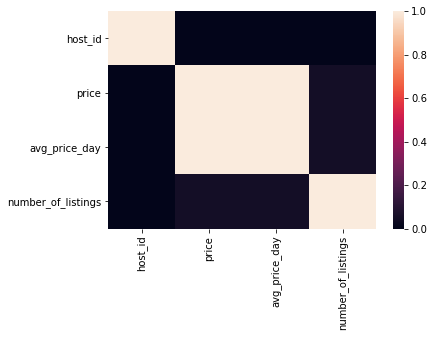

In [90]:
#Heatmap of correlation
ax = sns.heatmap(corr_data, vmin=0, vmax=1)

# When is the best time to rent?

## Data Cleaning

In [92]:
# Generate dictionary with name of each month given the number
# Generate new column with 1 if the property was rented certain day
complet_calendar = calendar.copy()
month_name = {index: month for index, month in enumerate(cal.month_abbr) if month}
month_numb = {month: index for index, month in enumerate(cal.month_abbr) if month}
complet_calendar['month'] = [month_name[int(d[5:7])] for d in complet_calendar['date']]
complet_calendar['is_rent'] = [1 if r == 't' else 0 for r in complet_calendar['available']]

In [93]:
complet_calendar.head()

,listing_id,date,available,price,month,is_rent
0,241032,2016-01-04,t,85.0,Jan,1
1,241032,2016-01-05,t,85.0,Jan,1
2,241032,2016-01-06,f,NaN,Jan,0
3,241032,2016-01-07,f,NaN,Jan,0
4,241032,2016-01-08,f,NaN,Jan,0


## Transformations for Visualizations

In [94]:
# Generate new dataframe with the average properties rented each month
# and the average price for each month of all the properties available that month
avg_month = complet_calendar.groupby(['month']).mean().reset_index()
avg_month['month_numb'] = [month_numb[m] for m in avg_month['month']]
avg_month = avg_month[['month_numb','month','is_rent','price']].sort_values(by='month_numb')
avg_month.index = avg_month['month_numb']#[i for i in range(len(avg_month))]
avg_month['is_rent'] = [round(r*100,2) for r in avg_month['is_rent']]
avg_month = avg_month.drop(columns=['month_numb','month'])
avg_month

,is_rent,price
month_numb,,
1,56.69,122.912176
2,66.22,124.293927
3,70.92,128.644488
4,66.38,135.097005
5,67.57,139.538183
6,67.44,147.473137
7,62.71,152.094150
8,64.51,150.656594
9,67.44,143.255949


## Visualizations

<AxesSubplot:xlabel='month_numb'>

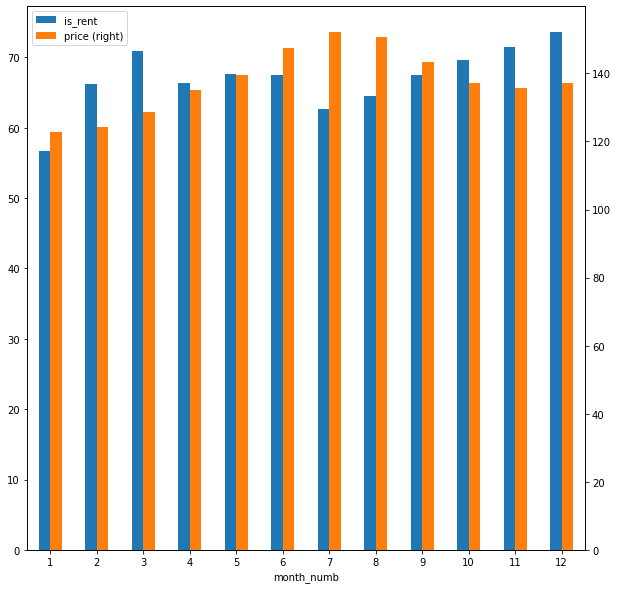

In [95]:
# Bar Graph of how many properties are available to rent and the average price of each month
avg_month.plot.bar(secondary_y='price',rot=0, figsize=(10,10))

# Which are the best areas to rent?



## Data Cleaning

In [96]:
# Remain with only certain columns from listing to analysis better the information
# Drop rows with NaN as wont be available of completing the data
filter_listing = listings[['id','neighbourhood','accommodates','city','price','review_scores_location']]
filter_listing = filter_listing.dropna()
filter_listing.head()

,id,neighbourhood,accommodates,city,price,review_scores_location
0,241032,Queen Anne,4,Seattle,85.0,9.0
1,953595,Queen Anne,4,Seattle,150.0,10.0
2,3308979,Queen Anne,11,Seattle,975.0,10.0
4,278830,Queen Anne,6,Seattle,450.0,9.0
5,5956968,Queen Anne,2,Seattle,120.0,10.0


In [97]:
# Group filter listing by neighbourhood
best_2_rent = filter_listing[['neighbourhood','price','review_scores_location']]
best_2_rent = best_2_rent.groupby('neighbourhood').mean()
best_2_rent.head()

,price,review_scores_location
neighbourhood,,
Alki,179.866667,9.866667
Arbor Heights,118.000000,8.666667
Atlantic,113.604651,9.093023
Ballard,120.289617,9.759563
Belltown,164.752747,9.807692


## Transformation for data visualizations

In [99]:
# As there are many locations to analysis and it gets complicated in a graph
# Take the top 20 and see if I can get to a good conclusion
# with reasonable price-review relationship
best_2_rent_top = best_2_rent.sort_values(by='review_scores_location',ascending=False)[:20]
best_2_rent_top

,price,review_scores_location
neighbourhood,,
Pike Market,92.000000,10.000000
Roxhill,60.000000,10.000000
Gatewood,105.230769,9.923077
Central Business District,161.281690,9.915493
Green Lake,142.261905,9.904762
Pike Place Market,177.774194,9.903226
Lower Queen Anne,145.000000,9.888889
Fauntleroy,173.444444,9.888889
Genesee,119.538462,9.884615


## Visualizations

<AxesSubplot:xlabel='neighbourhood'>

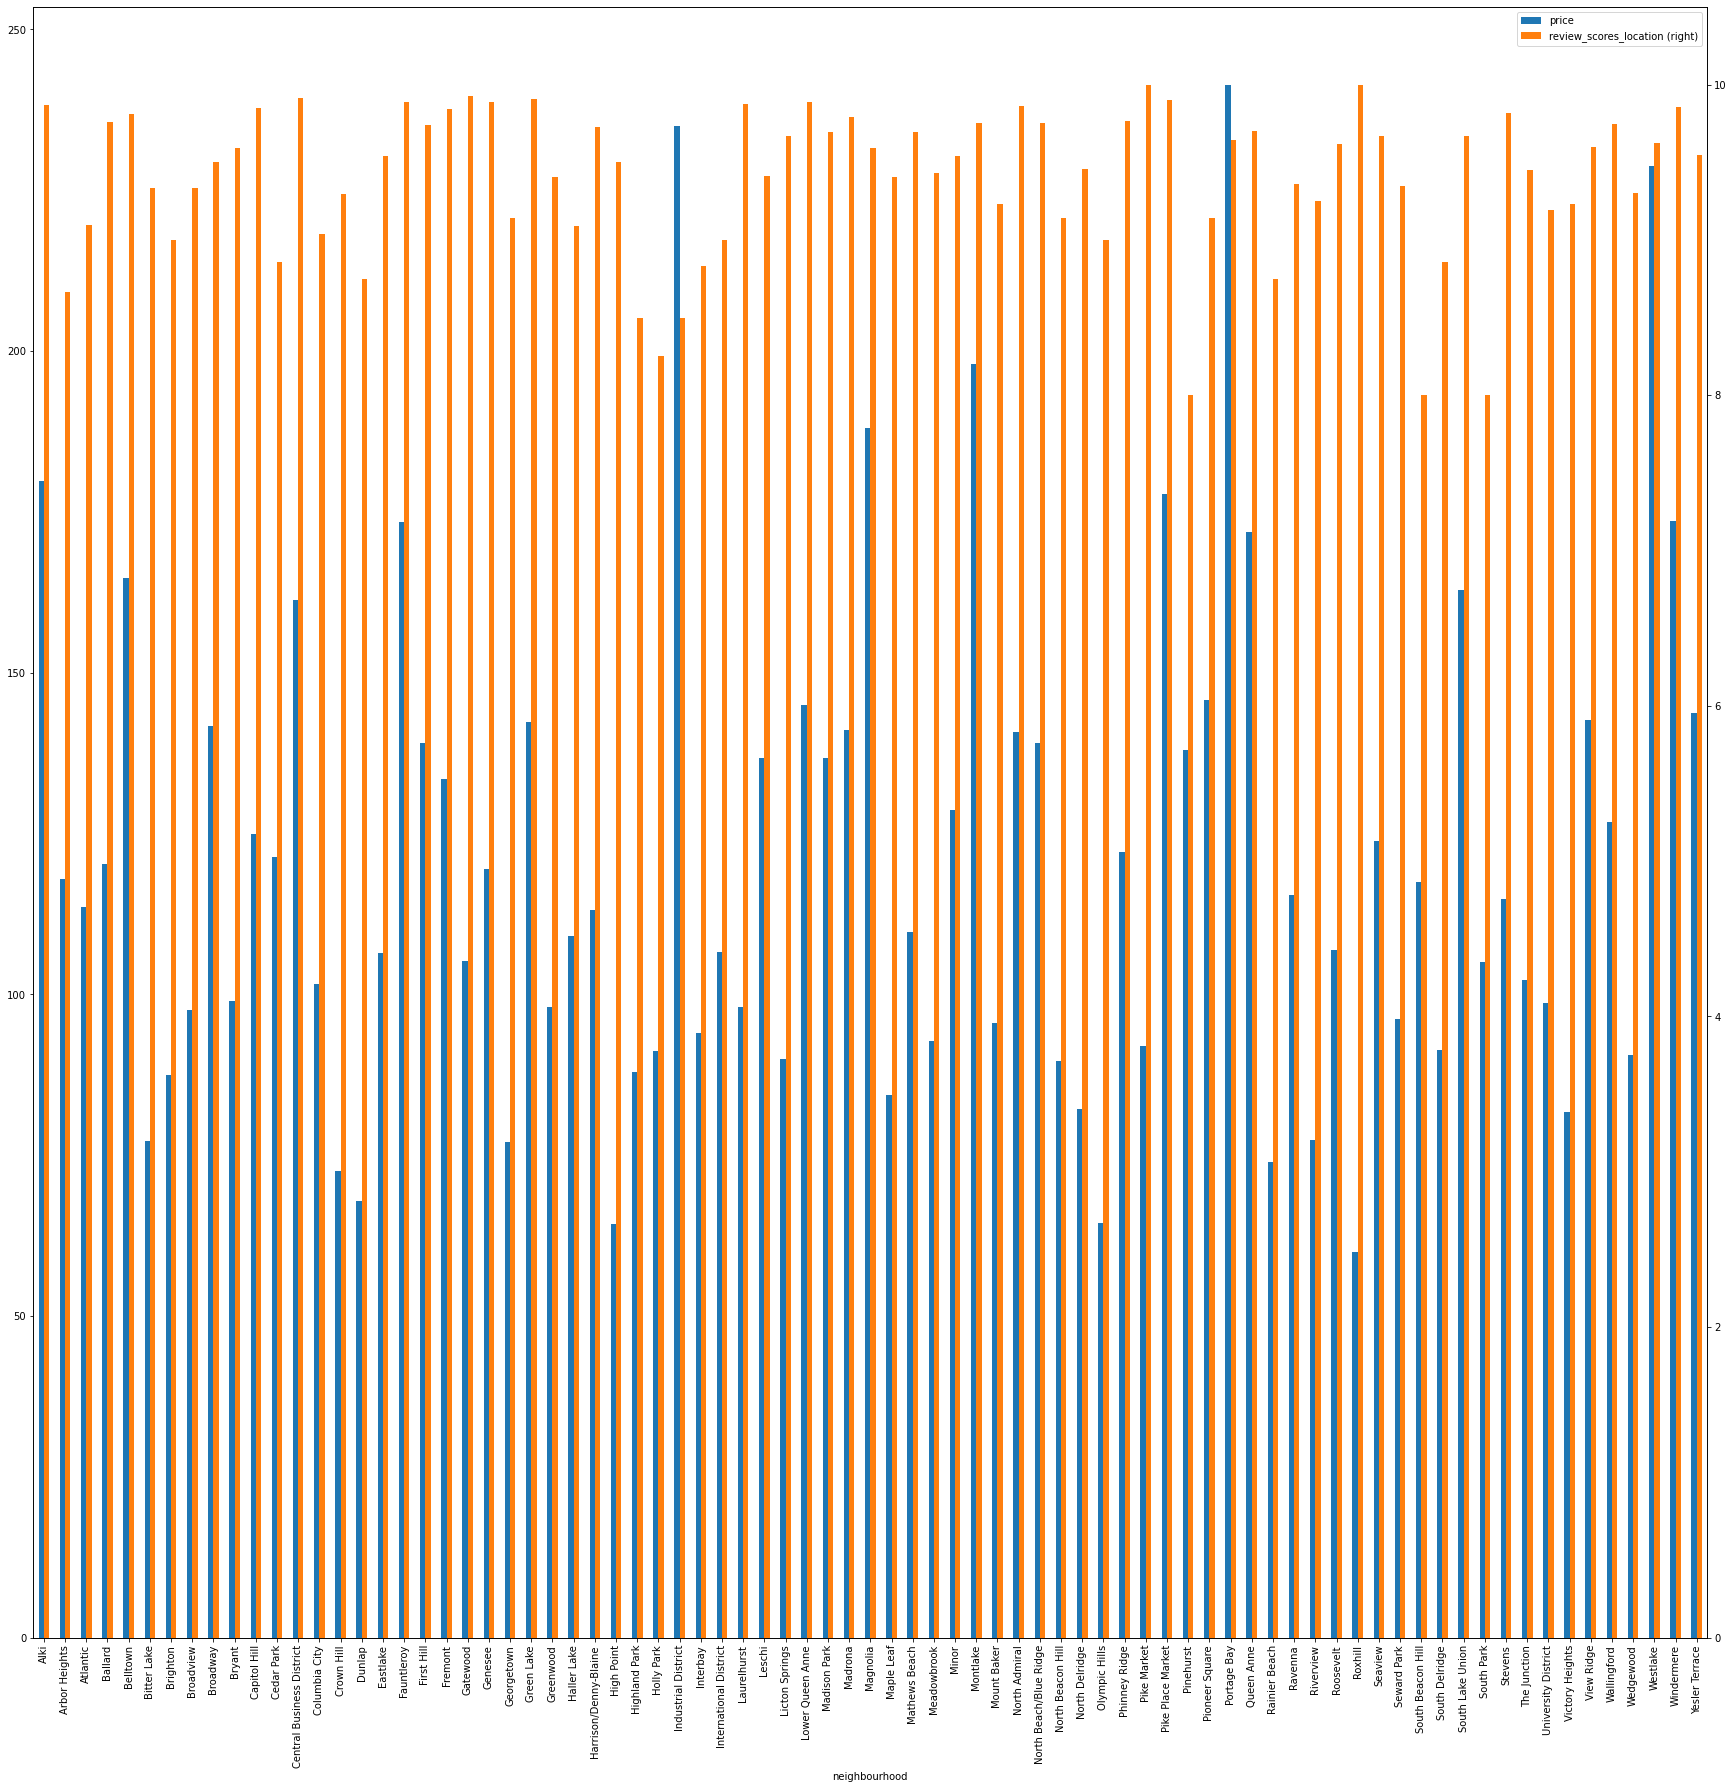

In [100]:
# Bar char of locations reviews and prices
best_2_rent.plot.bar(secondary_y='review_scores_location',rot=90, figsize=(30,30))

In [ ]:
# Bar char of top 20 locations reviews and prices
ax = best_2_rent_top.plot.bar(secondary_y='review_scores_location', rot=90, figsize=(9,10))
ax2 = ax.twinx()

plt.show()